# Chapter 3 : *Application for Comment Classification*

> Ronald Julio | 19340011 

> Artificial Intelligence | Project Akhir Pemula✌

> **Progress** ✅

## Ambil Sebuah Data

Data yang diambil berasal dari [sini](https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection). Data ini berisi tentang siapa saja pengguna yang melakukan *spam* pada komentarnya yang dapat dilihat pada gambar dibawah ini.
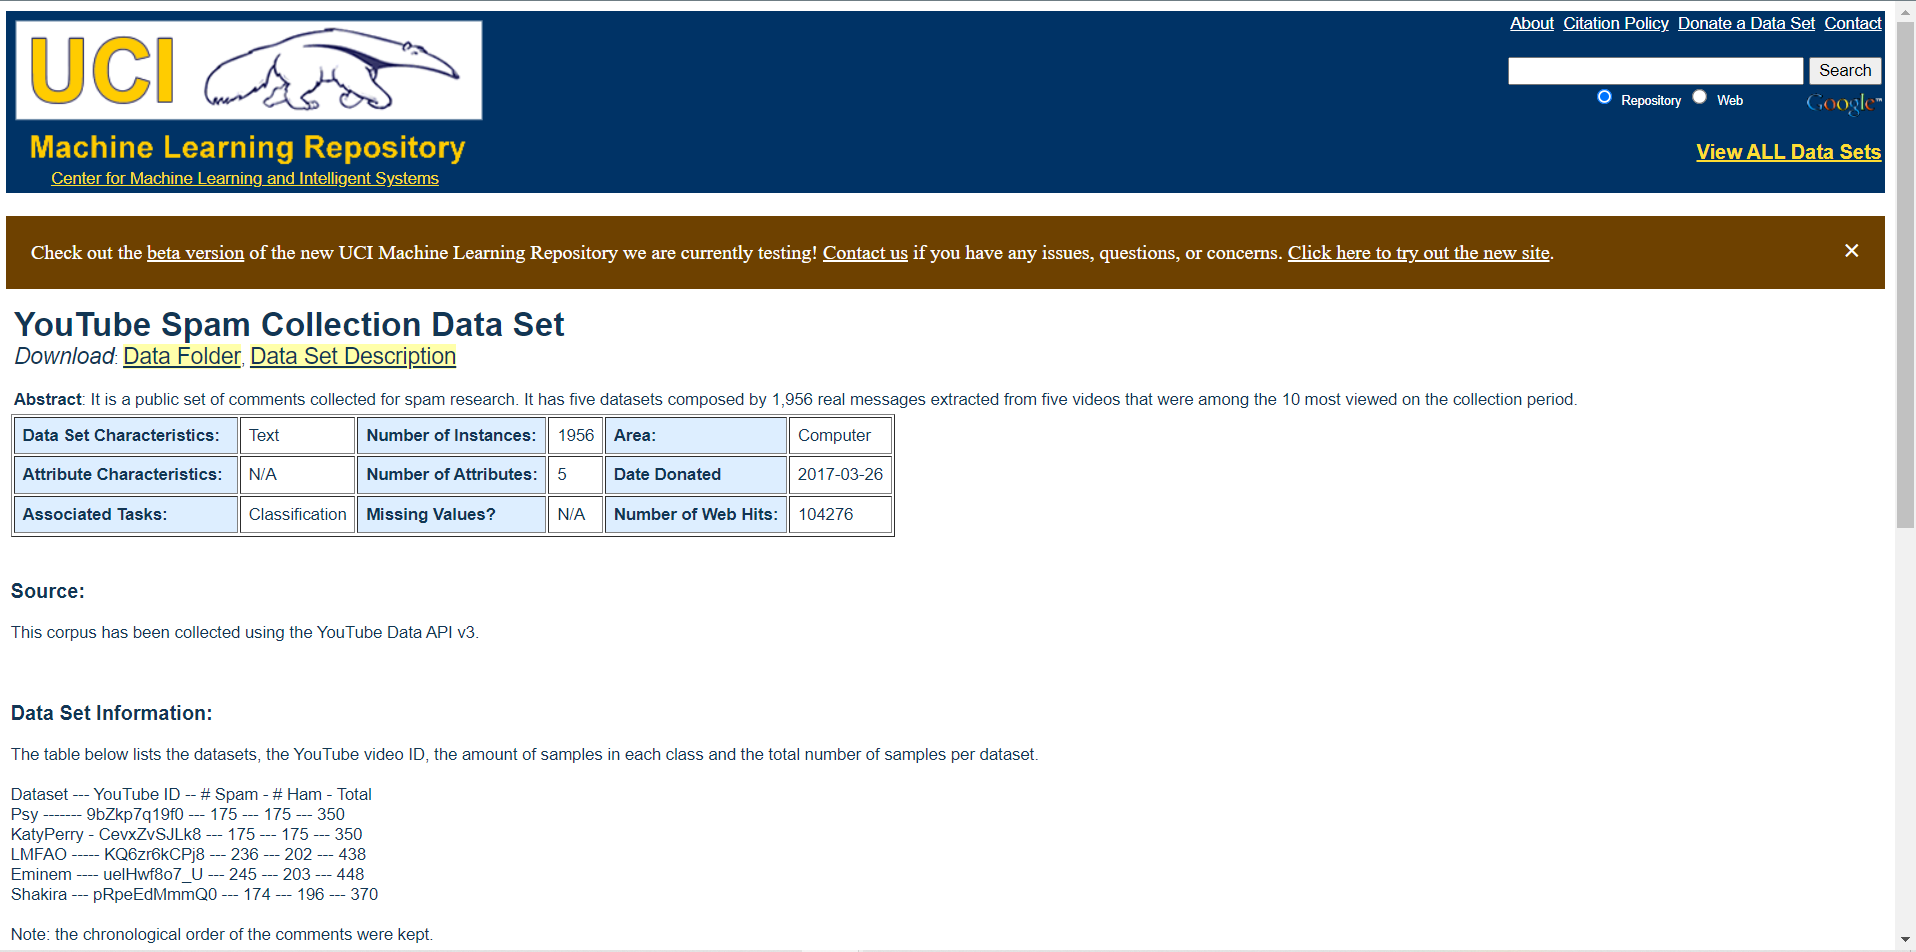

Data ini berisi 2000 komentar yang menurut kami populer dalam saluran Youtube. Data ini dibagi menjadi 2 nilai biner yaitu 1 dan 0 untuk pengguna yang melakukan *spam* atau tidak.

**Langkah 1**

Mengambil sebuah data yang berupa video dari PSY-Gangnam Style.

In [40]:
import pandas as pd
d = pd.read_csv('YT/Youtube01-Psy.csv')

Lalu, tampilkan hasil komentarnya dibawah ini.

In [41]:
d.tail()

,COMMENT_ID,DATE,CONTENT,CLASS
345,z13th1q4yzihf1bll23qxzpjeujterydj,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1
349,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,2015-06-05T18:05:16,The first billion viewed this because they tho...,0


Berdasarkan tabel diatas, ada lebih dari 2 kolom yaitu *COMMENT_ID*, *DATE*, *CONTENT*, dan *CLASS*. Akan tetapi yang dibutuhkan dalam project ini adalah kolom *content* dan *class*. Kolom *content* berisi tentang komentar sedangkan kolom *class* berisi angka biner 1 atau 0 yaitu golongan *spam* atau tidak.

Sebagai contoh, **subscribe to me for call of duty vids** tergolong *spam* dan **hi guys please my android photo editor download yada yada** juga tergolong *spam*.

**Langkah 2**

Cek masing-masing nilai yang *spam* atau tidak.

In [42]:
len(d.query('CLASS == 1'))

175

In [43]:
len(d.query('CLASS == 0'))

175

In [44]:
len(d)

350

**Langkah 3**

Bangun sebuah model

Dalam library Scikit-learn, sebuah teknik yang digunakan untuk menghitung jumlah kata yang muncul dan menyimpannya di dalam sebuah vektor dinamakan *bag-of-words*. Untuk membuat sebuah vektor dibutuhkan sebuah objek di Python dinamakan *CountVectorizer*, kemudian tampilkan *fit and transform* secara berulang.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [46]:
dvec = vectorizer.fit_transform(d['CONTENT'])

Hasil yang diperoleh berupa langkah-langkah. Jadi, langkah pertama *fit* untuk kata-kata yang ditampilkan dalam sebuah dalam langkah kedua yaitu *transform* memberikan frasa-frasa dalam bentuk matriks.

In [47]:
dvec

<350x1418 sparse matrix of type '<class 'numpy.int64'>'
	with 4354 stored elements in Compressed Sparse Row format>

Hasil yang diperoleh terdapat 350 baris, yang artinya ada 350 komentar yang berbeda dan 1418 jumlah kata. 1418 jumlah kata menampilkan kata-kata yang melewati setiap frasa.

Sekarang, tampilkan komentar single yang ada di indeks ke-349

In [48]:
print(d['CONTENT'][349])

The first billion viewed this because they thought it was really cool, the  other billion and a half came to see how stupid the first billion were...﻿


Bisa digunakan *vectorizer feature* untuk menemukan kata yang ada di dataset. Hasilnya terlihat dibawah ini.

In [49]:
vectorizer.get_feature_names()

['00',
 '000',
 '02',
 '034',
 '05',
 '08',
 '10',
 '100',
 '100000415527985',
 '10200253113705769',
 '1030',
 '1073741828',
 '11',
 '1111',
 '112720997191206369631',
 '12',
 '123',
 '124',
 '124923004',
 '126',
 '127',
 '13017194',
 '131338190916',
 '1340488',
 '1340489',
 '1340490',
 '1340491',
 '1340492',
 '1340493',
 '1340494',
 '1340499',
 '1340500',
 '1340502',
 '1340503',
 '1340504',
 '1340517',
 '1340518',
 '1340519',
 '1340520',
 '1340521',
 '1340522',
 '1340523',
 '1340524',
 '134470083389909',
 '1415297812',
 '1495323920744243',
 '1496241863981208',
 '1496273723978022',
 '1498561870415874',
 '161620527267482',
 '171183229277',
 '19',
 '19924',
 '1firo',
 '1m',
 '20',
 '2009',
 '2012',
 '2012bitches',
 '2013',
 '2014',
 '201470069872822',
 '2015',
 '2017',
 '210',
 '23',
 '24',
 '24398',
 '243a',
 '279',
 '29',
 '2b',
 '2billion',
 '2x10',
 '300',
 '3000',
 '313327',
 '315',
 '322',
 '33',
 '33gxrf',
 '39',
 '390875584405933',
 '391725794320912',
 '40beuutvu2zkxk4utgpz8k',
 '

Eksekusi perintah dibawah ini untuk mengacak sebuah dataset dengan **frac = 1**

In [50]:
dshuf = d.sample(frac=1)

Sekarang kita akan membagi data ini menjadi train dan test. Kita asumsikan bahwa 300 kolom digunakan untuk training sedangkan sisianya (50) digunakan untuk testing.

In [51]:
d_train = dshuf[:300]
d_test = dshuf[300:]
d_train_att = vectorizer.fit_transform(d_train['CONTENT']) # fit bag-of-words on training set
d_test_att = vectorizer.transform(d_test['CONTENT'])  # reuse on testing set
d_train_label = d_train['CLASS']
d_test_label = d_test['CLASS']

Sekarang kita akan menampilkan hasil yang telah ditransformasi dari sebuah dataset.

In [52]:
d_train_att

<300x1299 sparse matrix of type '<class 'numpy.int64'>'
	with 3799 stored elements in Compressed Sparse Row format>

In [53]:
d_test_att

<50x1299 sparse matrix of type '<class 'numpy.int64'>'
	with 435 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=80)

In [55]:
clf.fit(d_train_att, d_train_label)

RandomForestClassifier(n_estimators=80)

In [56]:
clf.score(d_test_att, d_test_label)

0.96

In [57]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(d_test_att)
confusion_matrix(d_test_label, pred_labels)

array([[24,  0],
       [ 2, 24]], dtype=int64)

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, d_train_att, d_train_label, cv=5)
# Tampilkan nilai rata-rata dan +/- 2 std
print("Accuracy : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy : 0.96 (+/- 0.05)


### Load Semua Dataset

In [59]:
d = pd.concat([pd.read_csv('YT/Youtube01-Psy.csv'),
              pd.read_csv('YT/Youtube02-KatyPerry.csv'),
              pd.read_csv('YT/Youtube03-LMFAO.csv'),
              pd.read_csv('YT/Youtube04-Eminem.csv'),
              pd.read_csv('YT/Youtube05-Shakira.csv')])

In [60]:
len(d)

1956

In [61]:
len(d.query('CLASS == 1'))

1005

In [62]:
len(d.query('CLASS == 0'))

951

In [63]:
dshuf = d.sample(frac = 1)
d_content = dshuf['CONTENT']
d_label = dshuf['CLASS']

In [64]:
# set up a pipeline
from sklearn.pipeline import Pipeline, make_pipeline
pipeline = Pipeline([
      ('bag-of-words', CountVectorizer()),
      ('random forest', RandomForestClassifier())
])
pipeline

Pipeline(steps=[('bag-of-words', CountVectorizer()),
                ('random forest', RandomForestClassifier())])

In [65]:
# atau panggil make_pipeline
make_pipeline(CountVectorizer(), RandomForestClassifier())

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [66]:
pipeline.fit(d_content[:1500], d_label[:1500])

Pipeline(steps=[('bag-of-words', CountVectorizer()),
                ('random forest', RandomForestClassifier())])

In [67]:
pipeline.score(d_content[1500:], d_label[1500:])

0.9583333333333334

In [68]:
pipeline.predict(["what a neat video!"])

array([0], dtype=int64)

In [69]:
pipeline.predict(["plz subscribe to my channel"])

array([1], dtype=int64)

In [70]:
scores = cross_val_score(pipeline, d_content, d_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.02)


In [71]:
# Tambahkan tfidf
from sklearn.feature_extraction.text import TfidfTransformer
pipeline2 = make_pipeline(CountVectorizer(),
                         TfidfTransformer(norm=None),
                         RandomForestClassifier())

In [72]:
scores = cross_val_score(pipeline2, d_content, d_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.01)


In [73]:
pipeline2.steps

[('countvectorizer', CountVectorizer()),
 ('tfidftransformer', TfidfTransformer(norm=None)),
 ('randomforestclassifier', RandomForestClassifier())]

In [74]:
# Pencarian parameter
parameters = {
    'countvectorizer__max_features': (None, 1000, 2000),
    'countvectorizer__ngram_range': ((1, 1), (1, 2)),   # unigrams or bigrams
    'countvectorizer__stop_words': ('english', None),
    'tfidftransformer__use_idf': (True, False),  # effectively turn on/off tfidf
    'randomforestclassifier__n_estimators': (20, 50, 100)
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline2, parameters, n_jobs=1, verbose=1)

In [75]:
grid_search.fit(d_content, d_label)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('tfidftransformer',
                                        TfidfTransformer(norm=None)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=1,
             param_grid={'countvectorizer__max_features': (None, 1000, 2000),
                         'countvectorizer__ngram_range': ((1, 1), (1, 2)),
                         'countvectorizer__stop_words': ('english', None),
                         'randomforestclassifier__n_estimators': (20, 50, 100),
                         'tfidftransformer__use_idf': (True, False)},
             verbose=1)

In [76]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set: ")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r"% (param_name, best_parameters[param_name]))

Best score: 0.963
Best parameters set: 
	countvectorizer__max_features: 2000
	countvectorizer__ngram_range: (1, 1)
	countvectorizer__stop_words: 'english'
	randomforestclassifier__n_estimators: 100
	tfidftransformer__use_idf: False
